In [1]:
#pip install --upgrade setuptools

Requirement already up-to-date: setuptools in c:\users\mwx827397\appdata\local\continuum\anaconda3\lib\site-packages (49.6.0)
Note: you may need to restart the kernel to use updated packages.


In [2]:
#!pip install contractions

  Using cached https://files.pythonhosted.org/packages/00/92/a05b76a692ac08d470ae5c23873cf1c9a041532f1ee065e74b374f218306/contractions-0.0.25-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/42/a8/03407021f9555043de5492a2bd7a35c56cc03c2510092b5ec018cae1bbf1/textsearch-0.0.17-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f4/9f/f0d8e8850e12829eea2e778f1c90e3c53a9a799b7f412082a5d21cd19ae1/pyahocorasick-1.4.0.tar.gz
  Stored in directory: C:\Users\mwx827397\AppData\Local\pip\Cache\wheels\0a\90\61\87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [195]:
# install and import necessary libraries.



import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import os
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mwx827397\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mwx827397\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mwx827397\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [196]:
os.chdir(r"E:\AI-ML\NLP")

In [197]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [198]:
data.shape

(14640, 15)

In [199]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [200]:
data = data[['airline_sentiment','text']]

In [201]:
pd.set_option('display.max_columns', None)  # Display full dataframe information (Non-turncated Text column.)

In [202]:
data.shape

(14640, 2)

In [203]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [204]:
data.dtypes

airline_sentiment    object
text                 object
dtype: object

### Removing HTML Tags

In [205]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


### Removing Numbers

In [206]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


### Replacing Contractions

In [207]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


### Tokenization

In [208]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [209]:
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


### Removal of Special Characters

In [210]:
def remove_special_characters(words):
    """Remove special chracters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub('[^a-zA-Z]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

### Removal of Punctuations

In [211]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

### Conversion to lowercase

In [212]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

### Lemmatization

In [213]:
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

### Removing Non-ASCII words

In [214]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

### Calling Functions

In [215]:
def normalize(words):
    words = remove_special_characters(words)
    words = remove_punctuation(words)
    words = to_lowercase(words)
    words = lemmatize_list(words)
    words = remove_non_ascii(words)
    return ' '.join(words)

### Joining the words back to text string

In [216]:
data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to the experience tacky
2,neutral,virginamerica i do not today must mean i need to take another trip
3,negative,virginamerica it be really aggressive to blast obnoxious entertainment in your guests face they have little recourse
4,negative,virginamerica and it be a really big bad thing about it


### Vectorization

### CountVectorizer

In [217]:
# Vectorization (Convert text data to numbers).

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [218]:
data_features.shape

(14640, 1000)

In [219]:
labels = data['airline_sentiment']

In [220]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

### Model Building using Random Forest Classifier

In [221]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7223996464428238


In [222]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

In [223]:
labels_unique = ['neutral','positive','negative']

### Confusion Matrix

[[ 378   64  442]
 [ 106  338  250]
 [ 126   51 2637]]


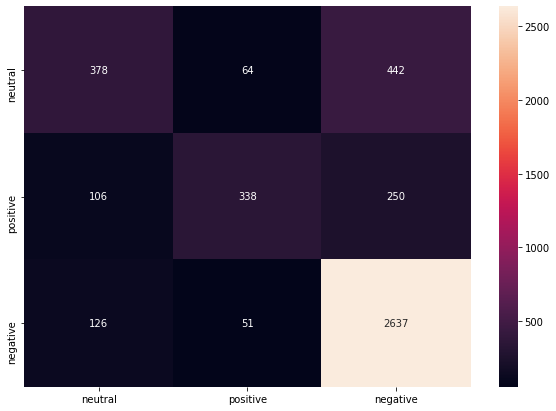

In [224]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result, labels_unique)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in labels_unique],
                  columns = [i for i in labels_unique])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [225]:
labels.dtypes

dtype('O')

In [226]:
y_test_1 = pd.DataFrame(y_test)

In [227]:
y_test_1['airline_sentiment'].value_counts()

negative    2814
neutral     884 
positive    694 
Name: airline_sentiment, dtype: int64

### TfidfVectorizer

In [228]:
# Using TfidfVectorizer to convert text data to numbers.

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

### Model Building

In [229]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7198080323918897


In [230]:
result = forest.predict(X_test)

### Confusion Matrix

[[ 379   46  459]
 [ 109  353  232]
 [ 135   66 2613]]


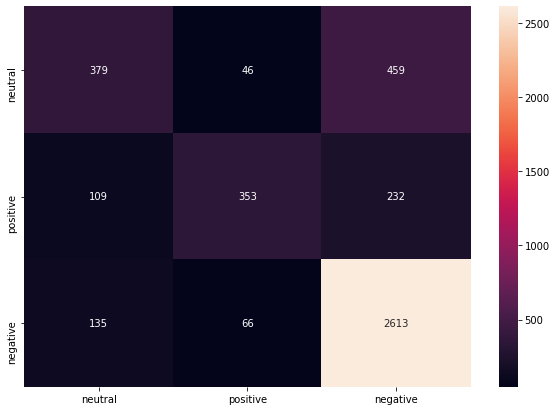

In [231]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result, labels_unique)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in labels_unique],
                  columns = [i for i in labels_unique])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Summary

#### Data is read from csv file to pandas data frame
#### All columns dropped from data frame except 'text' & 'airline_sentiment'
#### Then data pre-processing was started using different approaches including
    HTML TAG Removal (But it doesn't seem that HTML tags are present in text)
    Conversion to lowercase
    Removing Punctuation
    Removing Special Characters
    Lemmatizing
    Removal of non-ASCII characters
    Tokenization
    Removal of Numbers
#### Data set is then split into test and train data sets
#### Count Vectorizer is used first
#### Random Forest Classifier is used as a model to build an NLP sentimental engine
#### Accuracy of 72.23% is achieved
#### Confusion Matrix is plotted showing
    93.71% of 'negative' category sentiments are predicted accurately
    48.70% of 'positive' category sentiments are predicted accurately
    42.76% of 'neutral' category sentiments are predicted accurately
#### Because negative sentiments are more in total count that is why overall accuracy of model is 72.23%
#### Tfidf is used then 
#### Random Forest Classifier is used again as a model to build NLP sentimental engine
#### Accuracy of 71.98%, almost 72% is achieved which is slightly less than CountVectorizer method
#### Confusion Matrix is plotted showing
    92.85% of 'negative' category sentiments are predicted accurately
    50.86% of 'positive' category sentiments are predicted accurately
    42.87% of 'neutral' category sentiments are predicted accurately
#### positive category sentiments are better predicted in TfidfVectorization, but it's overall accuracy is slightly less than CountVectorization
#### Overall CountVectorization is a preferred model in this case for better accuracy than TfidfVectorization